In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import fcluster
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import mode
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.express as px

## Méthode du benchmark

## Solutions proposées

### Lecture des données

Tous les retraitements des données sont réalisés dans les modules `DataPreparer` et `DataScaler`.

In [3]:
from PrepareData import DataPreparer
path_to_data = r"C:\Users\meghn\Documents\Dauphine\Master\M2 Finance Quantitative\Semestre 2\Machine Learning\data\\"
train_data = DataPreparer(path = path_to_data, save_to_excel=False,train=True)
train_data.prepare_data()
train_data.save_data()

Saving the prepared data to data/prepared_data_train.parquet and data/prepared_data_train.xlsx
Data prepared and saved!


In [34]:
feature_columns =['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_season_sum_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_sum_SUM', 'HOME_PLAYERS_PLAYER_PENALTIES_SAVED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_REDCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_BLOCKED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_YELLOWCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_CROSSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_ASSISTS_season_average_SUM', 'HOME_PLAYERS_PLAYER_DUELS_LOST_season_average_SUM', 'HOME_PLAYERS_PLAYER_PASSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_TOTAL_season_average_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_season_std_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_std_SUM', 'HOME_PLAYERS_PLAYER_KEY_PASSES_season_std_SUM', 'AWAY_PLAYERS_PLAYER_BIG_CHANCES_MISSED_season_average_SUM', 'AWAY_PLAYERS_PLAYER_SHOTS_ON_TARGET_season_average_SUM']

In [4]:
from GetData import DataScaler
data_scaler = DataScaler(train=True)
train_data, feature_columns, target_column = data_scaler.get_data()
X_train, y_train = train_data[feature_columns], train_data[target_column]
# get data


Removed 13.08% of columns because they have more than 20% of values missing
Removed 16.34% of columns because they have only one value
Removed 44.42% of rows because they have missing values


In [5]:
test_data = DataPreparer(path = path_to_data, save_to_excel=False, train=False)
test_data.prepare_data()
test_data.save_data()

Saving the prepared data to data/prepared_data_test.parquet and data/prepared_data_test.xlsx
Data prepared and saved!


In [6]:
data_scaler = DataScaler(train=False)
test_data, feature_columns, target_column = data_scaler.get_data()
X_test, y_test = test_data[feature_columns], test_data[target_column]

Removed 6.78% of columns because they have more than 20% of values missing
Removed 13.91% of columns because they have only one value
Removed 41.46% of rows because they have missing values


In [17]:
train_data

,ID,results,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,...,AWAY_PLAYERS_PLAYER_PENALTIES_SCORED_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_RATING_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_SHOTS_BLOCKED_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_SHOTS_ON_TARGET_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_SHOTS_TOTAL_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_STARTING_LINEUP_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_TACKLES_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_TOTAL_CROSSES_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_TOTAL_DUELS_5_last_match_std_MEDIAN,AWAY_PLAYERS_PLAYER_YELLOWCARDS_5_last_match_std_MEDIAN
0,0,2,-0.483079,-0.724999,0.190096,-0.684066,-1.297925,-0.778936,-0.714156,0.103485,...,-0.012093,-0.573742,0.706571,-0.703585,0.100105,-0.862410,0.176387,-0.195289,0.882302,-0.492828
1,1,1,0.580898,1.362242,-0.526485,0.728693,0.132177,1.314350,1.025938,1.871681,...,-0.012093,0.933745,0.242737,-0.703585,-0.470599,1.131285,0.929177,1.547711,0.882302,-0.492828
2,2,2,-0.128420,-0.724999,0.190096,-0.684066,1.204753,-1.127817,-1.062175,-0.957432,...,-0.012093,-0.467954,0.428270,-0.703585,-0.226012,-0.862410,1.180107,0.178211,1.183411,2.293284
4,4,1,-0.483079,-0.377126,-0.884776,-0.330876,-0.225349,-0.081174,-0.366137,-0.250154,...,-0.012093,-0.626636,0.799338,1.930865,0.589280,-0.862410,-0.994619,0.053711,-0.397413,-0.492828
5,5,0,0.935558,0.666495,1.623260,0.375503,1.919804,1.314350,1.721976,0.103485,...,-0.012093,-0.362165,-1.519836,-0.703585,-0.226012,-0.862410,0.845533,2.792712,-4.236559,2.293284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12292,12292,0,-0.837738,-1.072873,-1.243067,0.375503,0.132177,-1.476699,-1.410194,0.103485,...,-0.012093,-0.150588,1.263173,1.829540,0.752339,1.574328,0.343674,4.784713,-0.472691,0.900228
12294,12294,0,0.226239,0.666495,0.190096,-0.330876,-0.225349,1.314350,1.721976,-1.664711,...,-0.012093,-0.785319,0.799338,1.829540,2.382922,-0.862410,-0.660046,0.925211,-0.698523,-0.492828
12295,12295,1,-1.192398,-1.420747,-1.601358,-1.037256,-0.940400,-0.430055,-0.366137,0.810764,...,-0.012093,-0.547295,-1.519836,1.728215,-1.204362,-0.862410,-1.078262,-0.444289,-1.150187,-0.492828
12299,12299,2,-0.128420,-0.724999,-0.526485,-1.037256,0.132177,-1.127817,-1.062175,1.518042,...,-0.012093,-0.758872,1.541474,-0.703585,-0.715187,-0.862410,-0.074543,0.178211,-0.246859,-0.492828


In [ ]:
from GetData import DataScaler
data_scaler = DataScaler(train=True)
train_data, _, target_column = data_scaler.get_data()
X_train, y_train = train_data[feature_columns], train_data[target_column]

Removed 13.08% of columns because they have more than 20% of values missing
Removed 16.34% of columns because they have only one value
Removed 44.42% of rows because they have missing values


In [ ]:
test_data = DataPreparer(path = path_to_data, save_to_excel=False, train=False)
test_data.prepare_data()
test_data.save_data()

Saving the prepared data to data/prepared_data_test.parquet
Data prepared and saved!


In [ ]:
data_scaler = DataScaler(train=False)
test_data, _, _ = data_scaler.get_data()
X_test, y_test = test_data[feature_columns], test_data[target_column]

Removed 6.78% of columns because they have more than 20% of values missing
Removed 13.91% of columns because they have only one value
Removed 41.46% of rows because they have missing values


In [36]:
X_train, y_train = train_data[feature_columns], train_data[target_column]

X_test, y_test = test_data[feature_columns], test_data[target_column]

In [7]:
for cat in train_data["results"].unique():
    print(cat, len(train_data[train_data["results"] == cat]))

2 2100
1 1761
0 2977


### Séparation de nos ensembles d'entraînement

In [24]:
scaler = StandardScaler()
imp = SimpleImputer(strategy="most_frequent")
X_train, X_test = scaler.fit_transform(imp.fit_transform(X_train)), scaler.fit_transform(imp.fit_transform(X_test))
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, 
# 	train_data[target_column], 
# 	test_size=0.2, 
# 	random_state=42,
# 	stratify=data[target_column],
# 	shuffle=True
# 	)

C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['HOME_PLAYERS_PLAYER_DISPOSSESSED_5_last_match_std_MIN'
 'AWAY_PLAYERS_PLAYER_TOTAL_CROSSES_season_std_MIN'
 'AWAY_PLAYERS_PLAYER_KEY_PASSES_5_last_match_std_MIN']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['HOME_PLAYERS_PLAYER_DRIBBLED_PAST_5_last_match_sum_MIN'
 'HOME_PLAYERS_PLAYER_KEY_PASSES_5_last_match_sum_MIN'
 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_5_last_match_average_MIN'
 'HOME_PLAYERS_PLAYER_KEY_PASSES_5_last_match_average_MIN'
 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_5_la

Nous pouvons constater que nous avons une accuracy de 0.48, supérieure à celle du benchmark de 0.4656. Cette méthode est donc prometteuse !

### 1. Modèle non supervisé - différenciation des clusters

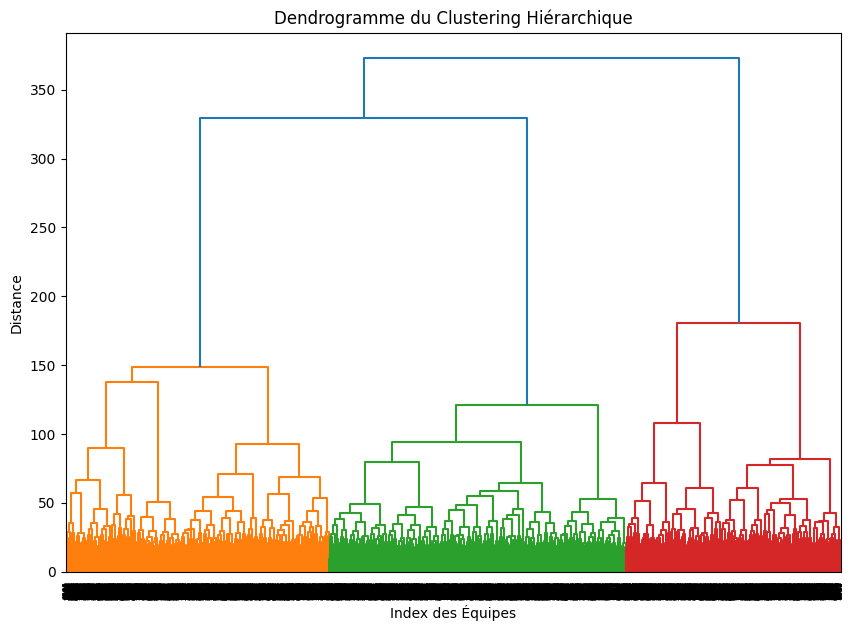

In [37]:
linked = linkage(X_train, method='ward')  
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
        #    labels=train['daya'].index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogramme du Clustering Hiérarchique')
plt.xlabel('Index des Équipes')
plt.ylabel('Distance')
plt.show()

Nous pouvons que nous avons 3 clusters (trois couleurs).

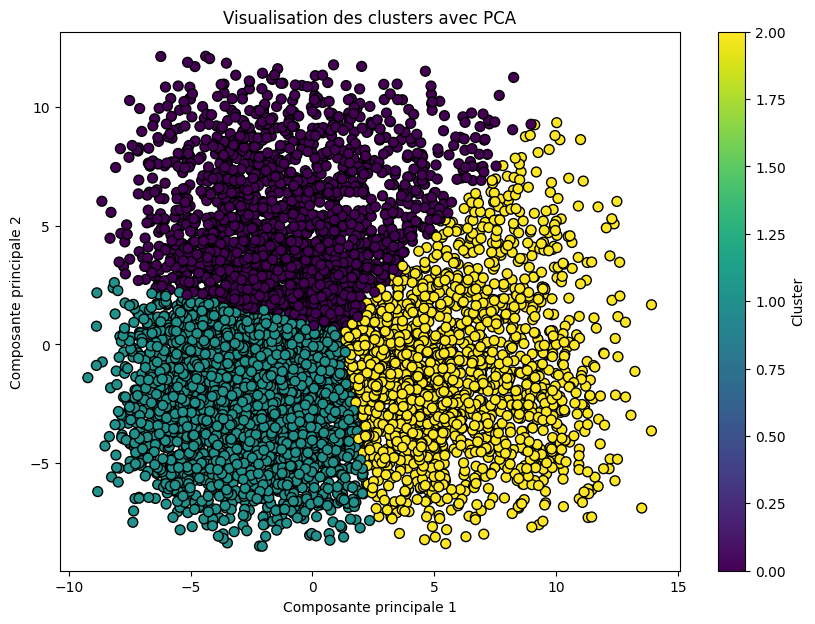

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
train_data['cluster'] = kmeans.labels_

cluster_labels = fcluster(linked, t=350 , criterion='distance')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

La partition des clusters est homogène et bien séparé: c'est un bon clustering.

In [39]:
best_threshold = 0
best_silhouette = -1
for threshold in range(100, 351, 50):
    labels = fcluster(linked, t=threshold, criterion='distance')
    num_clusters = len(set(labels))
    if num_clusters > 1:
        silhouette_avg = silhouette_score(X_train, labels)
        print(f"Pour une hauteur de coupe de {threshold}, l'indice de silhouette est : {silhouette_avg:.10f}")
    else:
        print(f"Pour une hauteur de coupe de {threshold}, nombre de clusters générés est {num_clusters}. Indice de silhouette non calculé.")
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_threshold = threshold

print(f"Meilleur seuil de coupe: {best_threshold} avec un indice de silhouette de {best_silhouette:.10f}")

Pour une hauteur de coupe de 100, l'indice de silhouette est : 0.0102746825
Pour une hauteur de coupe de 150, l'indice de silhouette est : 0.0497239324
Pour une hauteur de coupe de 200, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 250, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 300, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 350, l'indice de silhouette est : 0.0922291112
Meilleur seuil de coupe: 350 avec un indice de silhouette de 0.0922291112


Nous avons ici deux choix pour notre modèle non-supervisé : soit nous réalisons une optimisation de l'accuracy, soit du score de silhouette. A noter que les autres métriques sont mesurées en fonction de l'accuracy donc cela permet de comparer nos résultats à travers les modèles. 

In [40]:
def map_clusters_to_labels(cluster_labels, true_labels):
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

In [42]:
clusters = train_data['cluster']
labels = train_data['results']

mapped_labels = map_clusters_to_labels(clusters, labels)
accuracy = accuracy_score(train_data['results'], mapped_labels)
print(f"Clustering Accuracy: {accuracy:.4f}")

Clustering Accuracy: 0.4873


Nous avons une accuracy supérieure à celle du benchmark pour ces 3 clusters ! 

Essayons désormais d'optimiser ce modèle avec un Grid Search de validation croisée. Ici, nous essayons d'optimiser le score de silhouette.

In [50]:
#################################### PARAMETRES POUR LA GRID SEARCH CV ####################################
pipeline_Kmeans = Pipeline([
    ('kmeans', KMeans(random_state=42))
])

param_grid_Kmeans = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 20, 30]
}

**Score de silhouette**

In [40]:
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

grid_search_silhouette = GridSearchCV(pipeline_Kmeans, param_grid_Kmeans, cv=5, scoring=silhouette_scorer)
grid_search_silhouette.fit(X_train)

print(f"Meilleurs paramètres: {grid_search_silhouette.best_params_}")
print(f"Meilleurs Score de Silhouette : {grid_search_silhouette.best_score_:.4f}")

best_kmeans = grid_search_silhouette.best_estimator_.named_steps['kmeans']
train_data['cluster'] = best_kmeans.fit_predict(X_test)

Meilleurs paramètres: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Meilleurs Score de Silhouette : 0.1156


Calculons désormais le score d'accuracy.

In [48]:
clusters = data['cluster']
best_kmeans = grid_search_silhouette.best_estimator_.named_steps['kmeans']
test_clusters = best_kmeans.fit_predict(X_test)
mapped_labels = map_clusters_to_labels(test_clusters, y_test)
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Clustering Accuracy sur l'ensemble de test: {accuracy:.4f}")

Clustering Accuracy sur l'ensemble de test: 0.4423


Nous pouvons constater qu'avec un score de silhouette optimisé, nous avons une accuracy plus faible. Réalisons désormais la visualisation des deux clusters (seuil optimal pour celui-ci). Nous devons d'abord réduire les dimensions avec une ACP puisque nous avons beaucoup de dimensions.

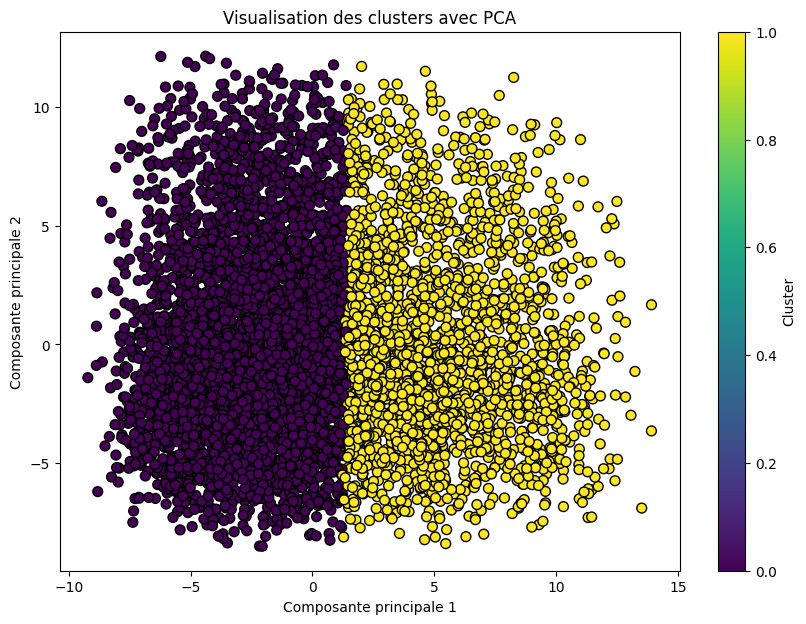

In [43]:

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[feature_columns])

# Visualiser les clusters en 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

La partition des clusters est homogène et bien séparée : c'est un bon clustering. Cependant, 2 clusters paraît faible par rapport aux résultats précedents.

**Score d'accuracy**

In [51]:
def accuracy_scorer(estimator, X, y):
    cluster_labels = estimator.fit_predict(X)
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        labels[mask] = mode(y[mask])[0]
    return accuracy_score(y, labels)

y = data[target_column]
grid_search_acc = GridSearchCV(pipeline_Kmeans, param_grid_Kmeans, cv=5, scoring=lambda estimator, X_train, y_train: accuracy_scorer(estimator, X_train, y_train))
grid_search_acc.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search_acc.best_params_}")
print(f"Meilleur Score d'Accuracy : {grid_search_acc.best_score_:.4f}")

# Clustering avec les meilleurs paramètres
best_kmeans = grid_search_acc.best_estimator_.named_steps['kmeans']
train_clusters = best_kmeans.fit_predict(X_train)
mapped_labels_tr = map_clusters_to_labels(train_clusters, y_train)
accuracy = accuracy_score(y_train, mapped_labels_tr)
print(f"Clustering Accuracy sur l'ensemble train: {accuracy:.4f}")

# Calculer l'accuracy finale
test_clusters = best_kmeans.fit_predict(X_test)
mapped_labels_t = map_clusters_to_labels(test_clusters, y_test)
accuracy = accuracy_score(y_test, mapped_labels_t)
print(f"Clustering Accuracy sur l'ensemble test: {accuracy:.4f}")


Meilleurs paramètres: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 10, 'kmeans__n_init': 30}
Meilleur Score d'Accuracy : 0.4932
Clustering Accuracy sur l'ensemble train: 0.4883
Clustering Accuracy sur l'ensemble test: 0.5022


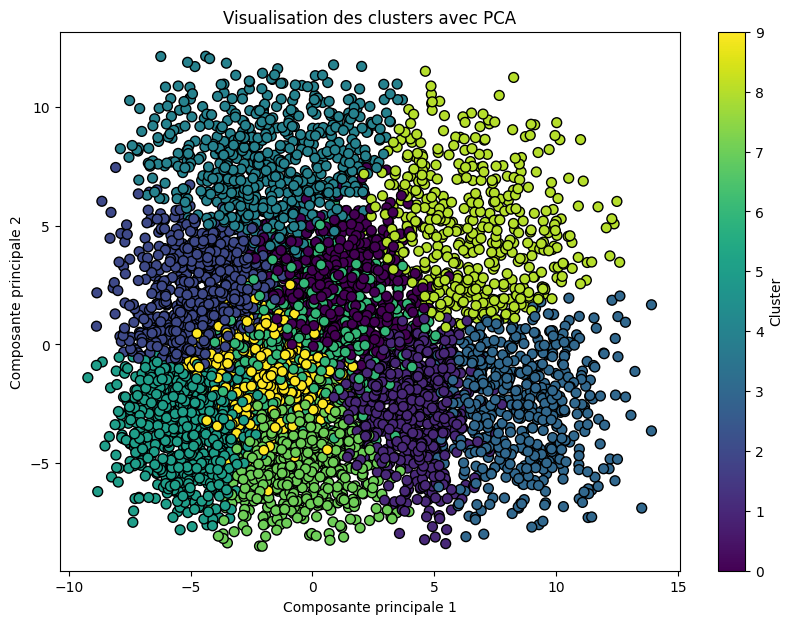

In [58]:
from sklearn.decomposition import PCA
# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser les clusters en 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()


Nous pouvons constater que certains clusters ne sont pas bien séparés en 2D. Ainsi, ils peuvent l'être en 3D.

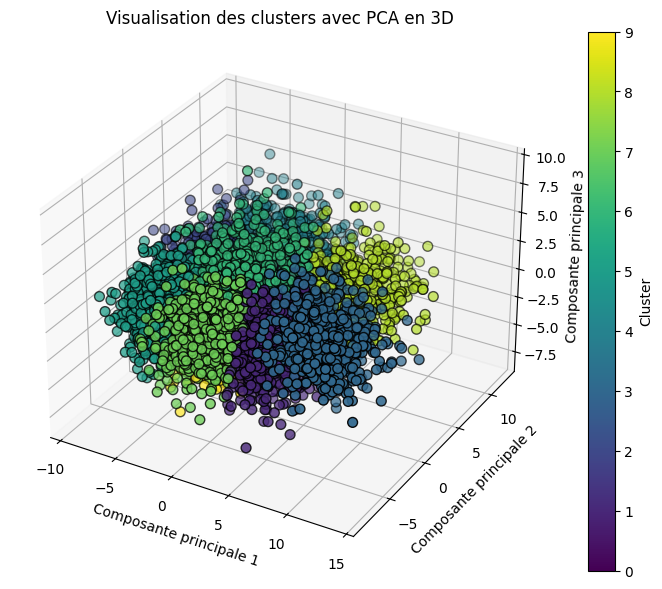

In [59]:
from mpl_toolkits.mplot3d import Axes3D

# Réduction de dimensionnalité avec PCA en 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Visualiser les clusters en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualisation des clusters avec PCA en 3D')
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
plt.colorbar(sc, label='Cluster')
plt.show()


Ce modèle a donc une performance supérieure à celle du benchmark (accuracy). En effet, avec un meilleur score d'accuracy sur l'ensemble de test (50%), cela est supérieur à la méthode du bench (0.46).

### 2. Modèle de régression logistique

Testons un modèle simple de régression logistique.

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.48903508771929827
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.61       605
           1       0.22      0.07      0.10       338
           2       0.47      0.51      0.49       425

    accuracy                           0.49      1368
   macro avg       0.41      0.43      0.40      1368
weighted avg       0.44      0.49      0.45      1368



C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(solver='liblinear')  

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']        
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy sur l'ensemble de test :", accuracy_score(y_test, predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres :  {'C': 0.01, 'penalty': 'l1'}
Meilleur score :  0.4952468007312614
Accuracy sur l'ensemble de test : 0.5131578947368421


Ce modèle simple a une accuracy très prommetteuse malgré sa méthode simple !

### 3. Modèle supervisé : Random Forest Classfier

In [ ]:
#################################### PARAMETRES POUR LA GRID SEARCH CV ####################################
param_grid_RF = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions_rf))


Accuracy: 0.4934210526315789


In [69]:
def model_fit_predict_CV(model, grid_search:dict, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy :", accuracy_score(y_test, predictions))
    grid_search = GridSearchCV(estimator=model, param_grid=grid_search, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')    
    grid_search.fit(X_train, y_train)
    print("Meilleurs paramètres trouvés :", grid_search.best_params_)
    print("Meilleur score de validation croisée :", grid_search.best_score_)
    best_model = grid_search.best_estimator_
    test_predictions = best_model.predict(X_test)
    print("Accuracy sur l'ensemble de test :", accuracy_score(y_test, test_predictions))
    print("Rapport de classification :\n", classification_report(y_test, test_predictions))


In [70]:
model_fit_predict_CV(RandomForestClassifier(random_state=42), param_grid_RF, X_train, y_train, X_test, y_test)

Accuracy : 0.4934210526315789
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres trouvés : {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Meilleur score de validation croisée : 0.4974405850091408
Accuracy sur l'ensemble de test : 0.5153508771929824
Rapport de classification :
               precision    recall  f1-score   support

           0       0.53      0.80      0.64       605
           1       0.35      0.05      0.09       338
           2       0.50      0.48      0.49       425

    accuracy                           0.52      1368
   macro avg       0.46      0.44      0.41      1368
weighted avg       0.48      0.52      0.46      1368



Nous pouvons constater que le score d'accuracy s'améliore avec cette méthode.

### 4. Modèle supervisé : pipeline de modèles Random Forest Classfier

Nous voulions ici tester une autre approche : créer une pipeline de modèles, le premier qui prédit un match nul (results = 1), et si ce n'est pas un match nul, un autre modèle qui prédit qui c'est une victoire ou pas.

In [71]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class DrawWinLossClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifier_draw, classifier_win_loss):
        self.classifier_draw = classifier_draw
        self.classifier_win_loss = classifier_win_loss

    def fit(self, X, y):
        # Create binary labels for draw classification (1 if draw, 0 otherwise)
        y_draw = (y == 1).astype(int)
        self.classifier_draw.fit(X, y_draw)

        # Select non-draw indices
        non_draw_indices = (y != 1)
        X_non_draw = X[non_draw_indices]
        y_win_loss = y[non_draw_indices]

        if X_non_draw.shape[0] > 0:
            y_win_loss = np.where(y_win_loss == 2, 1, 0)
            self.classifier_win_loss.fit(X_non_draw, y_win_loss)
        
        return self
    
    def predict(self, X):
        # Predict draws
        draw_predictions = self.classifier_draw.predict(X)
        final_predictions = np.full(X.shape[0], -99)  
        # Predict non-draws
        non_draw_indices = draw_predictions == 0
        if np.any(non_draw_indices):
            win_loss_predictions = self.classifier_win_loss.predict(X[non_draw_indices])
            final_predictions[non_draw_indices] = np.where(win_loss_predictions == 1, 2, 0)

        # Assign draw predictions
        final_predictions[draw_predictions == 1] = 1  # 1 is the code for 'DRAW'

        return final_predictions


In [73]:
custom_classifier = DrawWinLossClassifier(
    classifier_draw=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced'),
    classifier_win_loss=RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
)

param_grid_custom = {
    'classifier_draw__n_estimators': [100, 200],
    'classifier_draw__max_depth': [10, 20],
    'classifier_win_loss__n_estimators': [50, 100],
    'classifier_win_loss__max_depth': [10, 20],
}

model_fit_predict_CV(custom_classifier, param_grid_custom, X_train, y_train, X_test, y_test)


Accuracy : 0.5087719298245614
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs paramètres trouvés : {'classifier_draw__max_depth': 20, 'classifier_draw__n_estimators': 100, 'classifier_win_loss__max_depth': 20, 'classifier_win_loss__n_estimators': 100}
Meilleur score de validation croisée : 0.49689213893967094
Accuracy sur l'ensemble de test : 0.5095029239766082
Rapport de classification :
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       605
           1       1.00      0.00      0.01       338
           2       0.49      0.51      0.50       425

    accuracy                           0.51      1368
   macro avg       0.67      0.44      0.38      1368
weighted avg       0.63      0.51      0.43      1368



Cette pipeline montre donc une amélioration marginale de l'accuracy.

### 5. Réseau de neurones, Keras Classifier

## RAJOUTER DES GRAPHIQUES

In [96]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

# Define feature_columns
feature_columns = X_train.shape[1]  # number of features

def create_model(layer1=160, layer2=896, dropout_rate=0.15, l2_strength=0.001607168503200792, learning_rate=0.00001):
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=feature_columns
    ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
    ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set hyperparameters
layer1 = 160
layer2 = 896
dropout_rate = 0.15
l2_strength = 0.001607168503200792

# Create the model
model = create_model(
    layer1=layer1,
    layer2=layer2,
    dropout_rate=dropout_rate,
    l2_strength=l2_strength
)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')


Epoch 1/100
171/171 - 5s - 28ms/step - accuracy: 0.4274 - loss: 1.7492 - val_accuracy: 0.4598 - val_loss: 1.7079
Epoch 2/100
171/171 - 1s - 4ms/step - accuracy: 0.4680 - loss: 1.7068 - val_accuracy: 0.4773 - val_loss: 1.6887
Epoch 3/100
171/171 - 1s - 3ms/step - accuracy: 0.4883 - loss: 1.6870 - val_accuracy: 0.4759 - val_loss: 1.6798
Epoch 4/100
171/171 - 1s - 3ms/step - accuracy: 0.4876 - loss: 1.6771 - val_accuracy: 0.4781 - val_loss: 1.6741
Epoch 5/100
171/171 - 1s - 4ms/step - accuracy: 0.4941 - loss: 1.6667 - val_accuracy: 0.4773 - val_loss: 1.6687
Epoch 6/100
171/171 - 1s - 3ms/step - accuracy: 0.4943 - loss: 1.6599 - val_accuracy: 0.4766 - val_loss: 1.6640
Epoch 7/100
171/171 - 1s - 3ms/step - accuracy: 0.4978 - loss: 1.6548 - val_accuracy: 0.4810 - val_loss: 1.6597
Epoch 8/100
171/171 - 1s - 3ms/step - accuracy: 0.5026 - loss: 1.6486 - val_accuracy: 0.4766 - val_loss: 1.6558
Epoch 9/100
171/171 - 1s - 3ms/step - accuracy: 0.5055 - loss: 1.6397 - val_accuracy: 0.4744 - val_loss

In [95]:

# Define the neural network model
def create_model(layer1, layer2, dropout_rate, l2_strength):  # Adjust l2_strength as needed
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=len(feature_columns)
        ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
        ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Set hyperparameters
layer1 = 160
layer2 = 896
dropout_rate = 0.15
l2_strength = 0.001607168503200792

# Create the model
model = create_model(
    layer1=layer1,
    layer2=layer2,
    dropout_rate=dropout_rate,
    l2_strength=l2_strength
)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 123, but received input with shape (None, 124)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 124), dtype=float32)
  • training=True
  • mask=None

In [86]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) 

print(classification_report(y_test, predicted_classes))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.53      0.78      0.63       605
           1       0.33      0.01      0.03       338
           2       0.48      0.52      0.50       425

    accuracy                           0.51      1368
   macro avg       0.45      0.44      0.38      1368
weighted avg       0.46      0.51      0.44      1368



Nous avons ici une accuracy très intéressante mais qui stagne malgré l'utilisation d'un modèle considérablement plus complexe.

In [93]:
def create_model(layer1=160, layer2=896, dropout_rate=0.15, l2_strength=0.001607168503200792, learning_rate=0.00001):
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=len(feature_columns)
        ))
    
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
        ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [88]:
from scikeras.wrappers import KerasClassifier
keras = KerasClassifier(build_fn=create_model, verbose=0)
param_grid_keras = {
    'layer1': [128, 160, 192],
    'layer2': [512, 896, 1024],
    'dropout_rate': [0.1, 0.15, 0.2],
    'l2_strength': [0.001, 0.0016, 0.002],
    'learning_rate': [1e-4, 1e-5, 1e-6],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

In [89]:
grid = GridSearchCV(estimator=keras, param_grid=param_grid_keras, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


TypeError: _fit_and_score() missing 1 required keyword-only argument: 'score_params'

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(layer1=160, layer2=896, dropout_rate=0.15, l2_strength=0.001607168503200792, learning_rate=0.00001):
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=len(feature_columns)
        ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
        ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean} ({std}) with: {param}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


TypeError: _fit_and_score() missing 1 required keyword-only argument: 'score_params'

In [94]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def create_model(layer1=160, layer2=896, dropout_rate=0.15, l2_strength=0.001607168503200792, learning_rate=0.00001):
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=X_train.shape[1]  # Assuming X_train is defined and preprocessed
    ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
    ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model) #, verbose=0)

# Define the parameter grid
param_grid = {
    'model__layer1': [128, 160, 192],
    'model__layer2': [512, 896, 1024],
    'model__dropout_rate': [0.1, 0.15, 0.2],
    'model__l2_strength': [0.001, 0.0016, 0.002],
    'model__learning_rate': [1e-4, 1e-5, 1e-6],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the results and evaluate the best model
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean} ({std}) with: {param}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
loss, accuracy = best_model.model_.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


TypeError: _fit_and_score() missing 1 required keyword-only argument: 'score_params'